# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analysing (using descriptive statistics) and visualizing data. In this more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

# Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At minimum, this should include:

* Loading the data (which is stored in the file train.csv)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new datagrames based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

# Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centres.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


#### Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables

In [3]:
print('The average property tax rate is ${}.'.format(round(df.tax.mean(), 2)))

The average property tax rate is $409.28.


Text(0, 0.5, 'Number of Towns')

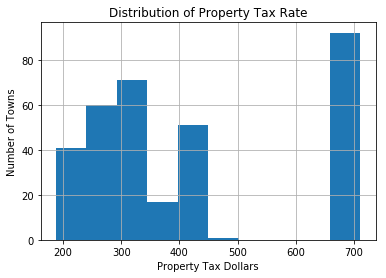

In [4]:
df.tax.hist()
plt.title('Distribution of Property Tax Rate')
plt.xlabel('Property Tax Dollars')
plt.ylabel('Number of Towns')

### Comments
#### The above distribution is skewed right with a significant set of outliers at the high 650-700 dollar range with a mean at around 400 dollars. But the majority of towns pay around 700 dollars.

## Splitting on the Mean - Property Tax value

Text(0, 0.5, 'Number of Towns')

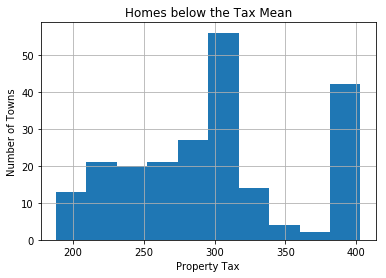

In [5]:
tax_mean = df.tax.mean()
df[(df['tax'] < tax_mean)].tax.hist()
plt.title('Homes below the Tax Mean')
plt.xlabel('Property Tax')
plt.ylabel('Number of Towns')

Text(0, 0.5, 'Number of Towns')

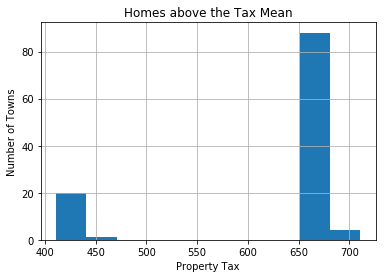

In [6]:
df[(df['tax'] > tax_mean)].tax.hist()
plt.title('Homes above the Tax Mean')
plt.xlabel('Property Tax')
plt.ylabel('Number of Towns')

## Average Number of Rooms per House

In [7]:
print('The average number of rooms per dwelling is {}.'.format(round(df.rm.mean())))

The average number of rooms per dwelling is 6.


Text(0, 0.5, 'Number of Towns')

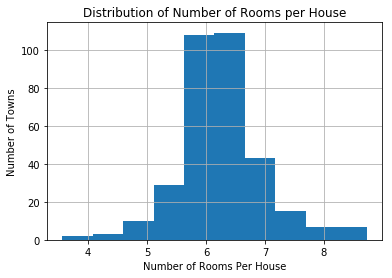

In [8]:
df.rm.hist()
plt.title('Distribution of Number of Rooms per House')
plt.xlabel('Number of Rooms Per House')
plt.ylabel('Number of Towns')

### Comments
#### The above resembles a normal distribution with a mean of about 6 rooms.

## Average Number of Student for Every Teacher

In [9]:
print('The average number of students for every teacher is {}.'.format(round(df.ptratio.mean())))

The average number of students for every teacher is 18.


Text(0, 0.5, 'Number of Towns')

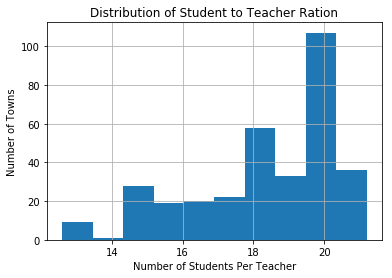

In [10]:
df.ptratio.hist()
plt.title('Distribution of Student to Teacher Ration')
plt.xlabel('Number of Students Per Teacher')
plt.ylabel('Number of Towns')

### Comments
#### The above distribution is skewed to the left. The mean is around 18 but most towns have a 20 to 1 student to teacher ratio.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


# Assessment of Data 

### Nox - nitrogen oxides concentration (parts per 10 million)

#### Measures of Central Tendancy

##### nox mean = 0.557144, nox median = 0.538000, nox std = 0.114955

In [12]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


Text(0, 0.5, 'Number of Houses')

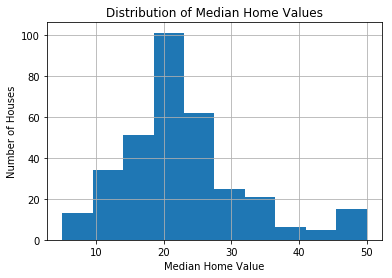

In [13]:
df.medv.hist()
plt.title('Distribution of Median Home Values')
plt.xlabel('Median Home Value')
plt.ylabel('Number of Houses')

## Subset 1 Analysis

#### Mean value of homes is around 200,000 dollars

## Homes Proximity to the Charles River

In [14]:
# Create a 2 new dataframes based on your existing data, where one contains all the 
# properties next to the Charles river, and the other one contains properties that aren't.

df.chas.value_counts()

0    313
1     20
Name: chas, dtype: int64

In [15]:
df[(df.chas == 0)].head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [16]:
df[(df.chas == 1)].head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,143,3.32105,0.0,19.58,1,0.871,5.403,100.0,1.3216,5,403,14.7,396.90,26.82,13.4
104,155,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403,14.7,321.02,15.12,17.0
108,161,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
110,164,1.51902,0.0,19.58,1,0.605,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
145,209,0.13587,0.0,10.59,1,0.489,6.064,59.1,4.2392,4,277,18.6,381.32,14.66,24.4


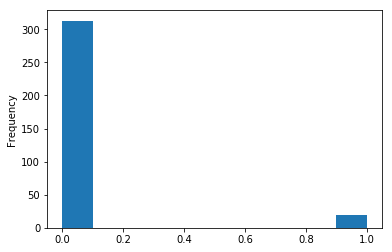

In [17]:
df.chas.plot(kind='hist')

## Crime Rate

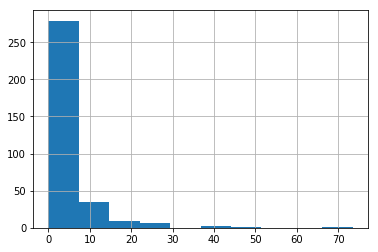

In [18]:
# Create 2 new datagrames based on a certain split for crime rate.
df.crim.hist()

In [19]:
print('Q1: ', df.crim.quantile(.25))
print('Mean:', df.crim.mean())
print('Min:', df.crim.min())
print('Max', df.crim.max())

Q1:  0.07896
Mean: 3.360341471471471
Min: 0.00632
Max 73.5341


## Box Plots
#### Average Number of Rooms per House

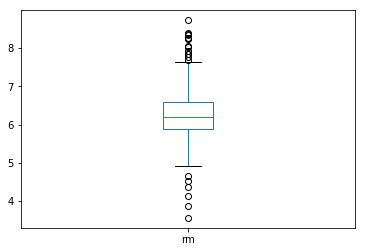

In [21]:
df.rm.plot(kind='box')

#### Analysis - Significant number of outliers skewing box plot data displayed above.

## Investigating Correlation

In [22]:
import numpy as np

In [43]:
counter = 0
for n, feat1 in enumerate(df.columns):
    for feat2 in df.columns[n+1:]:
        r2 = np.corrcoef(df[feat1], df[feat2])[0][1]
        if r2 > 0:
            counter = counter + 1
            print('{} and {} have a correlation coefficient of {}!'.format(feat1, feat2, r2))
print('\n')
print('Total of {} positive correlations among the feature variables!'.format(counter))

ID and crim have a correlation coefficient of 0.456312451060633!
ID and indus have a correlation coefficient of 0.42197789506585465!
ID and chas have a correlation coefficient of 0.007958247879511363!
ID and nox have a correlation coefficient of 0.4401847457876115!
ID and age have a correlation coefficient of 0.25729964410504946!
ID and rad have a correlation coefficient of 0.7075262711727565!
ID and tax have a correlation coefficient of 0.6862460154999973!
ID and ptratio have a correlation coefficient of 0.3098382267965461!
ID and lstat have a correlation coefficient of 0.28195276086020427!
crim and indus have a correlation coefficient of 0.42222756034241404!
crim and nox have a correlation coefficient of 0.4630009856612331!
crim and age have a correlation coefficient of 0.3790338208768804!
crim and rad have a correlation coefficient of 0.6666356998752915!
crim and tax have a correlation coefficient of 0.6170811427464465!
crim and ptratio have a correlation coefficient of 0.3134094955

### Analysis No. 1
##### The above coefficients for various feature comarisons are positive

In [44]:
counter2 = 0
for n, feat1 in enumerate(df.columns):
    for feat2 in df.columns[n+1:]:
        r2 = np.corrcoef(df[feat1], df[feat2])[0][1]
        if r2 > .75:
            counter2 = counter2 + 1
            print('{} and {} have a correlation coefficient of {}!'.format(feat1, feat2, r2))
print('\n')
print('Total of {} strong positive correlations among the feature variables!'.format(counter2))

indus and nox have a correlation coefficient of 0.7500874390908758!
rad and tax have a correlation coefficient of 0.9035618963206117!


Total of 2 strong positive correlations among the feature variables!


### Analysis No. 2
#### The above correlations are strong positive correlations above 0.75.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!